<h2 style="color:blue" align="center">Tensorboard demo using handwritten digits classification using neural network</h2>

In this notebook we will classify handwritten digits using a simple neural network which has only input and output layers. We will than add a hidden layer and see how the performance of the model improves

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
len(X_train)

60000

In [4]:
len(X_test)

10000

In [5]:
X_train[0].shape

(28, 28)

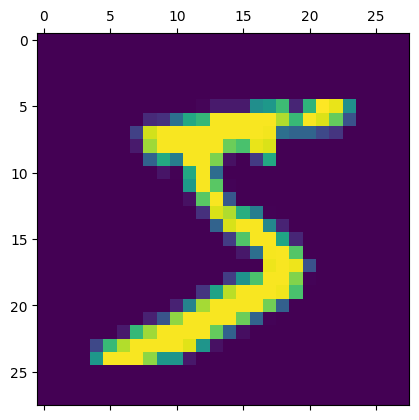

In [6]:
plt.matshow(X_train[0])

In [7]:
y_train[0]

5

In [8]:
X_train = X_train / 255
X_test = X_test / 255

In [9]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [10]:
X_train_flattened.shape

(60000, 784)

<h3 style='color:purple'>Using Flatten layer so that we don't have to call .reshape on input dataset</h3>

In [11]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

tb_callback = tf.keras.callbacks.TensorBoard(log_dir="logs/", histogram_freq=1)

model.fit(X_train, y_train, epochs=5, callbacks=[tb_callback])

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2702 - accuracy: 0.9239
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1211 - accuracy: 0.9647
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0837 - accuracy: 0.9758
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0659 - accuracy: 0.9798
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0513 - accuracy: 0.9844


In [12]:
# %load_ext tensorboard
# %tensorboard --logdir logs/fit

Either run above inline magic or go to git bash or your command prompt and type below to run it,
`tensorboard --logdir logs/`
This will launch tensorboard at this url which you can open in your browser `http://localhost:6006/`

In [13]:
model.get_weights()

[array([[ 0.02848233, -0.05836254, -0.01342596, ...,  0.07678376,
         -0.04374874, -0.07833109],
        [ 0.07896373, -0.05902456, -0.02467927, ..., -0.01758566,
          0.02267102,  0.00259913],
        [ 0.00378568,  0.03619866,  0.03713913, ..., -0.06698991,
         -0.06282029, -0.0198801 ],
        ...,
        [-0.00223907,  0.00829397, -0.00293305, ..., -0.01785821,
          0.07100357, -0.01815752],
        [ 0.05557632, -0.07180846, -0.04578244, ...,  0.06176811,
         -0.04084954, -0.08076209],
        [-0.0419702 , -0.04372657, -0.0638292 , ...,  0.07873468,
          0.04034527, -0.00168023]], dtype=float32),
 array([ 0.08636696, -0.03584229,  0.04260017,  0.0592672 , -0.02551066,
         0.07827455,  0.00675118,  0.04547727, -0.14380457,  0.11857837,
        -0.00440239, -0.02276396, -0.02846294, -0.06198044,  0.03807617,
         0.21727931,  0.18532592,  0.08576639,  0.03466113,  0.00047129,
         0.05377313, -0.03429979,  0.02911085, -0.06783461,  0.106